## still a draft
## maybe ok if correlation matrix has no nan
## coding style, try to follow rules

In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

## additional import

from sklearn.metrics import matthews_corrcoef
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
import gc
from tqdm import tqdm

In [3]:
## self modules
#from pcaExpBase import plotlyScatter as plotSca
from pcaExpBase import Spectral_Clustering_Tool as scTool
from pcaExpBase import osPcaLaplacian as ospca
from pcaExpBase import pyod_my as pyod

In [4]:
#data = pd.read_table("aps_failure_training_set.csv", header=None)
## customer
data = pd.read_csv("Epileptic_Seizure/data.csv")
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [5]:
## encoding feature 0?
## value_count first
data.iloc[:, 0].value_counts()

X16.V1.714    1
X8.V1.574     1
X3.V1.451     1
X1.V1.334     1
X8.V1.462     1
X22.V1.26     1
X22.V1.6      1
X3.V1.283     1
X21.V1.562    1
X9.V1.14      1
X22.V1.763    1
X15.V1.110    1
X10.V1.341    1
X3.V1.264     1
X3.V1.784     1
X8.V1.6       1
X10.V1.283    1
X6.V1.453     1
X4.V1.591     1
X5.V1.592     1
X10.V1.761    1
X14.V1.601    1
X3.V1.131     1
X14.V1.162    1
X19.V1.93     1
X1.V1.912     1
X17.V1.144    1
X22.V1.243    1
X2.V1.894     1
X21.V1.853    1
             ..
X16.V1.292    1
X16.V1.264    1
X4.V1.5       1
X23.V1.85     1
X17.V1.833    1
X4.V1.334     1
X18.V1.104    1
X8.V1.702     1
X6.V1.663     1
X1.V1.674     1
X4.V1.963     1
X17.V1.62     1
X11.V1.312    1
X10.V1.333    1
X5.V1.241     1
X17.V1.522    1
X14.V1.715    1
X8.V1.88      1
X6.V1.434     1
X23.V1.151    1
X12.V1.134    1
X10.V1.422    1
X2.V1.71      1
X1.V1.752     1
X12.V1.97     1
X6.V1.451     1
X6.V1.204     1
X7.V1.524     1
X6.V1.941     1
X5.V1.144     1
Name: Unnamed: 0, Length

In [6]:
## only names
## drop 1 columns
dataTemp = data.drop(['Unnamed: 0'], axis=1)
dataTemp.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [7]:
## check missing
dataTemp.isnull().any().any()


False

In [8]:
DimT = len(dataTemp.columns)
print(DimT)

179


In [9]:
## now load y label since need to drop 0th row

#y_temp = pd.read_csv('secom_labels.data.txt', sep=' ', header=None)
y_temp = dataTemp.iloc[:, DimT-1]


#y_temp = y_temp.drop([0,1])
y_temp.head()

0    4
1    1
2    5
3    5
4    5
Name: y, dtype: int64

y_label = y_temp.iloc[:, 0]
y_label[ y_label == -1] = 0
y_label

In [11]:
y = y_temp

In [12]:
y.value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

In [13]:
y_temp.value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

In [14]:
## deal with label
## 1 against rest first
N = len(y_temp)
y_label = np.zeros(N)
y_label[y_temp == 1] = 1

# y_label ready

In [15]:
## drop label
dataTemp2 = dataTemp.drop(['y'], axis=1)
dataTemp2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [16]:
dataTemp2.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1860.000000,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-8.000000,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,35.000000,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,2047.000000,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000


In [17]:
## drop std == 0 
STD_DES = dataTemp2.describe().loc['std']
zeros = np.where(STD_DES == 0)[0]
zeros

array([], dtype=int64)

In [18]:
## random sample data since too large
## from train test split?



In [18]:
## for Epileptic 
## 1 against rest
## 1 against another(2,3,4,5)(latter)


In [ ]:
# ---------------- process --------------------

## import dataset

## recognize y_label
## X be dataFrame, y be series
## see if need reduce row with random sampling split

## deal with nan

## plotly to check distribution, see shape
### whole
## Laplacian, see best k from eigen gap(make function)
### clustered


In [ ]:
## see whole first


In [19]:
## optional
pStr = 'Epileptic'

dataTemp2Sca = (dataTemp2-dataTemp2.min()) / (dataTemp2.max()-dataTemp2.min())

In [20]:
# make sure that data exclude y_label
dataX = dataTemp2
#dataX = dataTemp2Sca
y_current = y_label
#y_label = y_temp
# y_label ready

## try detecting

In [21]:
currentData = dataX
# y_label need back to series
## also bring back index

X_index = dataX.index

y_Series = pd.Series(y_label, index=X_index)
y_Series = y_Series.rename('label')
y_Series.head()


0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

## set up Experiments

In [22]:
NTRAIL = 5
RANDOMPICK = False
#RANDOMPICK = False
UPDATE = False

In [23]:
SCALE=False

## parameters for ABOD and LOF

In [24]:
## para for abod
n_abod = 15
contami_abod = 0.04

# para for lof
n_lof = 15
contami_lof = 0.02


## parameters for online PCA

In [25]:
ini_For_W = 1

sRateW = 0.39
#sRateW = sampArr[aucBestIdx[0]]
#betaW = 1/(sRateW*(norNum))

dropRateT_W = 0.13
#dropRateT_W = dropArr[aucBestIdx[1]]

## parameters for multi-view online PCA

In [26]:
MAX = 0
AVG = 1

In [27]:
NOR_RAN = True

In [28]:
k = 3

In [29]:
sRateClus = 0.4
#betaClus = 1/(sRateClus*(norNum))
ini_For_Clus = 1
dropRateT_Clus = 0.04


In [30]:
thresLowBDD = 0.001
thresUpBDD = 1
strategy = AVG

## one time experiments

In [31]:
X_nor, X_test, y_test = ospca.getTrainTest(currentData, y_Series, SCALE=SCALE)

In [32]:
betaClus = 1/(sRateClus*len(X_nor))

In [33]:
fineClus, tprClus, fprClus, aucClus, thresholdArr, scoreOneTable, feaNumArr = ospca.oneRandomTrailClus(X_nor, X_test, y_test,
                       sRateClus, betaClus, ini_For_Clus, dropRateT_Clus,
                       k, thresLowBDD, strategy,
                       thresUpBDD=1,
                       UPDATE=UPDATE, NOR_RAN=NOR_RAN, Name=' ')

In Whuir_spectral.py, using normalized random walk!
[array([ 95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94], dtype=int64), array([139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177],
      dtype=int64)]
[0.0513317

100%|████████████████████████████████████| 6900/6900 [00:04<00:00, 1718.32it/s]


tpr:  0.9282608695652174 , fpr:  0.058043478260869565


## N trails experiments, model: online PCA, multi-view PCA

tpr:  0.8552173913043478 , fpr:  0.19608695652173913
Auc whole:  0.9048083175803403
----------------------------------
In Whuir_spectral.py, using normalized random walk!
[array([128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68], dtype=int64), array([ 69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106

100%|████████████████████████████████████| 6900/6900 [00:03<00:00, 1745.49it/s]


tpr:  0.9239130434782609 , fpr:  0.058260869565217394
Auc clusters:  0.978436483931947


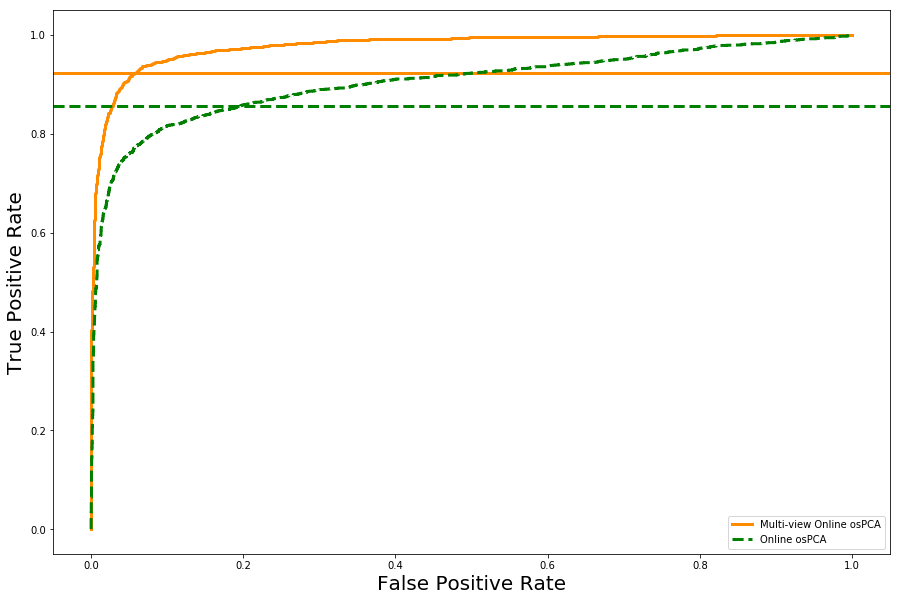

tpr:  0.8673913043478261 , fpr:  0.2341304347826087
Auc whole:  0.906739697542533
----------------------------------
In Whuir_spectral.py, using normalized random walk!
[array([ 67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
      dtype=int64), array([130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
    

100%|████████████████████████████████████| 6900/6900 [00:03<00:00, 1766.49it/s]


tpr:  0.9339130434782609 , fpr:  0.06565217391304348
Find intersection
[128 129]
[]
[130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177]
ComLen
[ 2.  0. 48.]
pick
[130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177]
------------------------
[67 68]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]
[]
ComLen
[ 2. 67.  0.]
pick
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]
------------------------
[

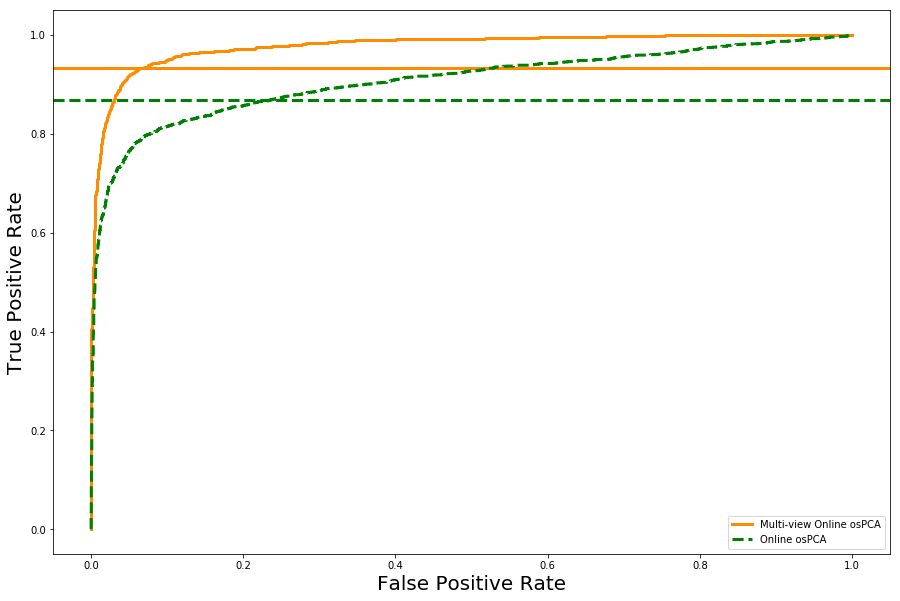

tpr:  0.8917391304347826 , fpr:  0.2821739130434783
Auc whole:  0.908402551984877
----------------------------------
In Whuir_spectral.py, using normalized random walk!
[array([136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95], dtype=int64), array([ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12

100%|████████████████████████████████████| 6900/6900 [00:03<00:00, 1773.58it/s]


tpr:  0.9265217391304348 , fpr:  0.05565217391304348
Find intersection
[136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177]
[]
[130 131 132 133 134 135]
ComLen
[42.  0.  6.]
pick
[136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177]
------------------------
[]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]
[]
ComLen
[ 0. 67.  0.]
pick
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]
------------------------
[]
[69 70 71 72 73 74 75 76 77 78 79 8

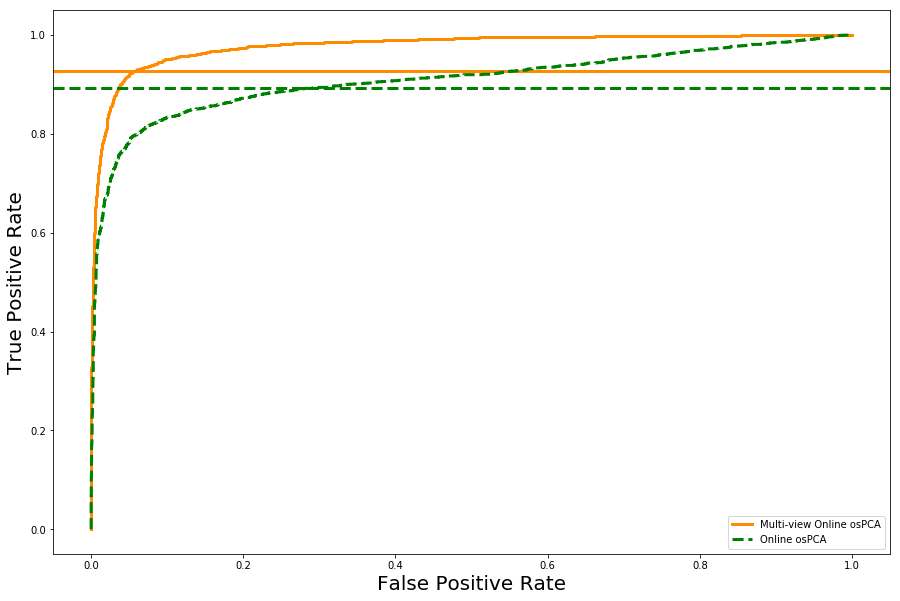

tpr:  0.841304347826087 , fpr:  0.15521739130434783
Auc whole:  0.9065103969754253
----------------------------------
In Whuir_spectral.py, using normalized random walk!
[array([ 55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54], dtype=int64), array([128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,


100%|████████████████████████████████████| 6900/6900 [00:03<00:00, 1795.21it/s]


tpr:  0.9282608695652174 , fpr:  0.057608695652173914
Find intersection
[]
[]
[136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177]
ComLen
[ 0.  0. 42.]
pick
[136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177]
------------------------
[55 56 57 58 59 60 61 62 63 64 65 66]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]
[]
ComLen
[12. 55.  0.]
pick
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]
------------------------
[ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119

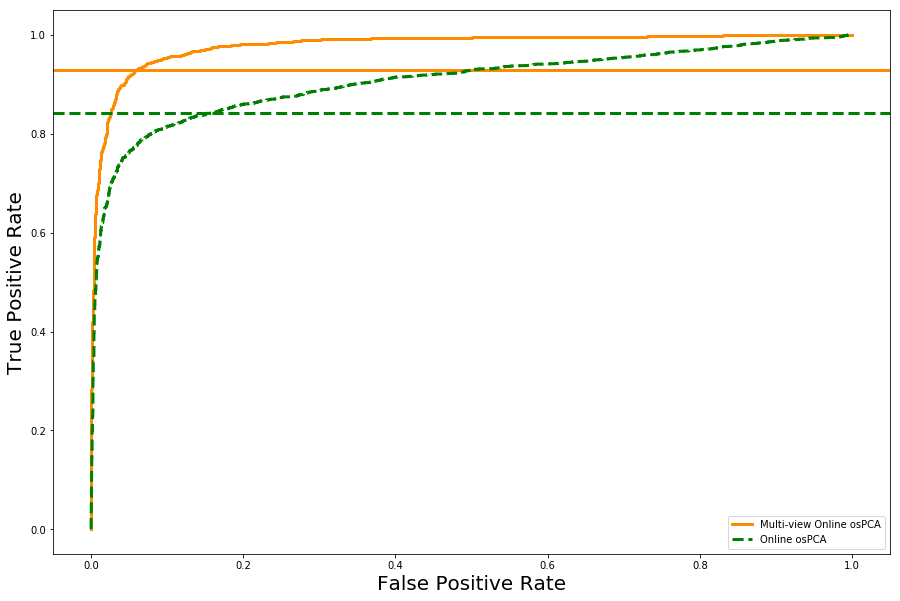

tpr:  0.8260869565217391 , fpr:  0.12369565217391304
Auc whole:  0.9040430056710775
----------------------------------
In Whuir_spectral.py, using normalized random walk!
[array([121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54], dtype=int64), array([ 55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  9

100%|████████████████████████████████████| 6900/6900 [00:03<00:00, 1832.46it/s]


tpr:  0.918695652173913 , fpr:  0.051956521739130436
Find intersection
[136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177]
[]
[]
ComLen
[42.  0.  0.]
pick
[136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177]
------------------------
[]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]
[]
ComLen
[ 0. 55.  0.]
pick
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]
------------------------
[121 122 123 124 125 126 127]
[]
[ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 12

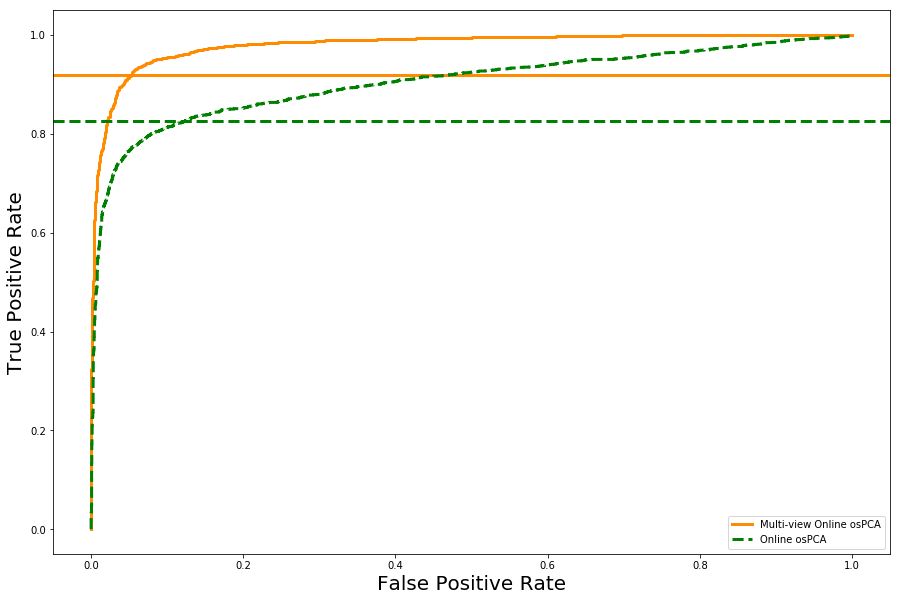

For whole dataset: 
Auc:  0.9061007939508506 +- 0.0015348648316453948
Tpr:  0.8563478260869566 +- 0.022440174613245933
Fpr:  0.1982608695652174 +- 0.056116776703578085
For Laplacian: 
Average threshold: 
[0.05575273 0.06847782 0.05108859]
threshold in order: 
[0.05108859 0.05575273 0.06847782]
Auc:  0.9787682608695653 +- 0.000779339232877852
Tpr:  0.9262608695652175 +- 0.005007366973526255
Fpr:  0.057826086956521736 +- 0.004486905965337021
Fine clusters: 
[array([0, 1, 2], dtype=int64), array([0, 1, 2], dtype=int64), array([0, 1, 2], dtype=int64), array([0, 1, 2], dtype=int64), array([0, 1, 2], dtype=int64)]
Common clusters: 
[136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]
[ 96  97  98  99 100 101 

In [34]:
aucWhole, tprWhole, fprWhole, aucLap, tprLap, fprLap, thresDescend = ospca.nTrail_Whole_Laplacian(currentData, y_Series,
                           sRateW, ini_For_W, dropRateT_W,
                           sRateClus, ini_For_Clus, dropRateT_Clus,
                           k, thresLowBDD, strategy,
                           NTRAIL=NTRAIL,
                           thresUpBDD=thresUpBDD,
                           RANDOMPICK=False,
                            UPDATE=UPDATE, NOR_RAN=NOR_RAN,
                            )

## N trails experiments, model: online PCA, multi-view PCA, LOF, ABOD

tpr:  0.8726086956521739 , fpr:  0.24565217391304348
Auc whole:  0.9070369565217392
----------------------------------
In Whuir_spectral.py, using normalized random walk!
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54]), array([121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177]), array([ 55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100

 32%|███▏      | 2180/6900 [00:00<00:00, 10896.57it/s]

[0.05471607 0.06244903 0.05668216]
Fine Clusters:  [0 1 2]
Not update


100%|██████████| 6900/6900 [00:00<00:00, 11408.02it/s]


tpr:  0.9421739130434783 , fpr:  0.07239130434782609
Auc clusters:  0.981003686200378
Auc Lof:  0.9914228733459357
Auc Abod:  0.9942334593572779


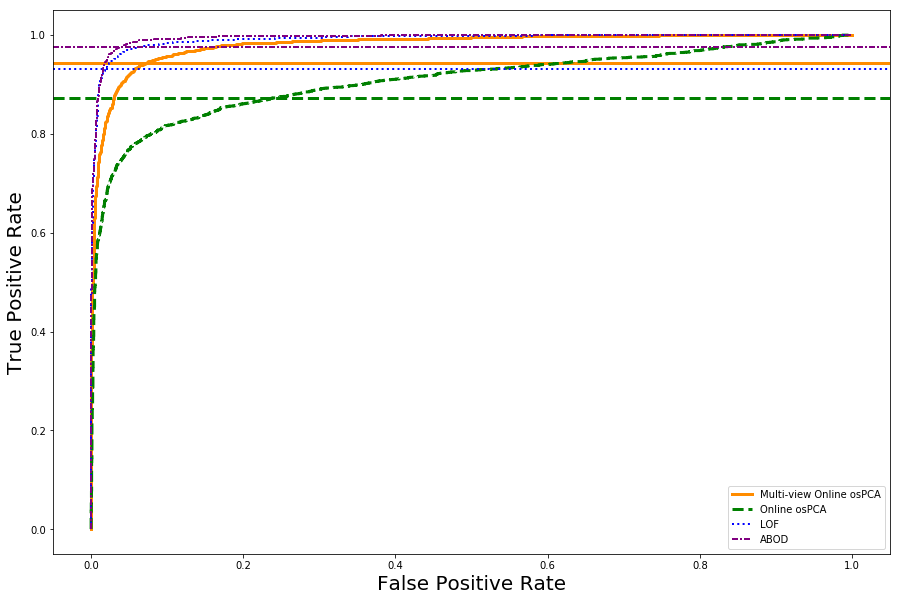

tpr:  0.8726086956521739 , fpr:  0.2417391304347826
Auc whole:  0.9057828922495275
----------------------------------
In Whuir_spectral.py, using normalized random walk!
[array([ 56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55]), array([122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 

 17%|█▋        | 1195/6900 [00:00<00:00, 11947.08it/s]

[0.05974301 0.06306608 0.05362552]
Fine Clusters:  [0 1 2]
Not update


100%|██████████| 6900/6900 [00:00<00:00, 12387.35it/s]


tpr:  0.9352173913043478 , fpr:  0.06760869565217391
Find intersection
[]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]
[]
ComLen
[ 0. 55.  0.]
pick
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]
------------------------
[121]
[]
[122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177]
ComLen
[ 1.  0. 56.]
pick
[122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177]
------------------------
[ 56  57  58  59

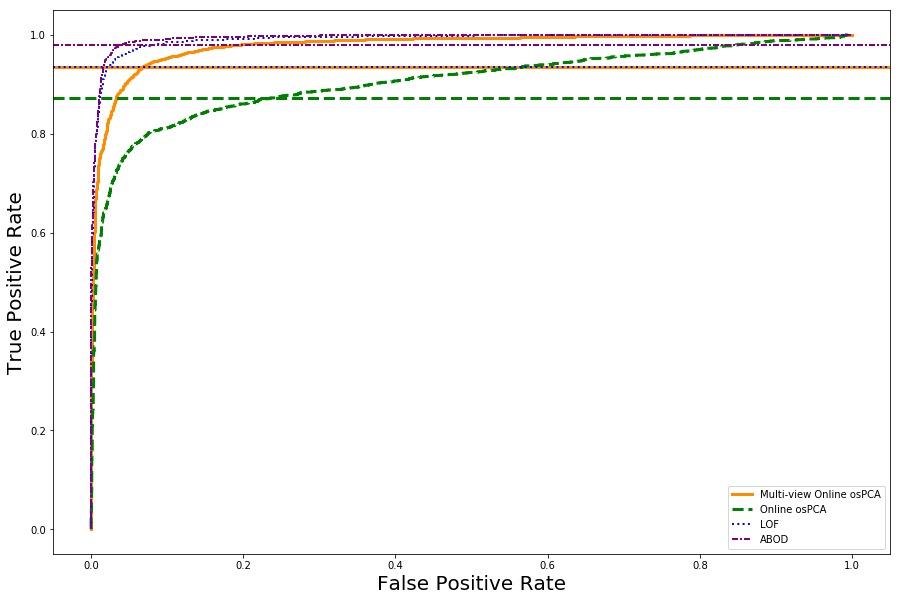

tpr:  0.8756521739130435 , fpr:  0.26608695652173914
Auc whole:  0.9049870510396975
----------------------------------
In Whuir_spectral.py, using normalized random walk!
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52]), array([ 53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123]), array([124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 1

 18%|█▊        | 1227/6900 [00:00<00:00, 12260.66it/s]

[0.06057615 0.0628768  0.05292129]
Fine Clusters:  [0 1 2]
Not update


100%|██████████| 6900/6900 [00:00<00:00, 12107.75it/s]


tpr:  0.9260869565217391 , fpr:  0.05673913043478261
Find intersection
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
[53 54]
[]
ComLen
[53.  2.  0.]
pick
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
------------------------
[]
[122 123]
[124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
ComLen
[ 0.  2. 54.]
pick
[124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
------------------------
[]
[ 56  57  58  59  60  61  62  63  

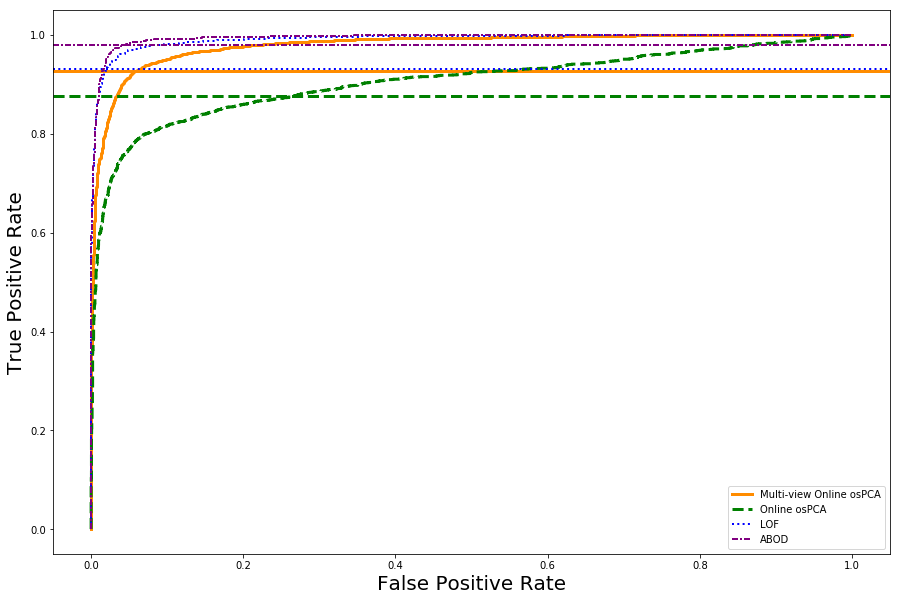

tpr:  0.87 , fpr:  0.23347826086956522
Auc whole:  0.9058487712665406
----------------------------------
In Whuir_spectral.py, using normalized random walk!
[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53, 177]), array([ 54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119]), array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 

 18%|█▊        | 1243/6900 [00:00<00:00, 12420.30it/s]

[0.05930053 0.06173133 0.06092524]
Fine Clusters:  [0 1 2]
Not update


100%|██████████| 6900/6900 [00:00<00:00, 11898.15it/s]


tpr:  0.9234782608695652 , fpr:  0.056956521739130433
Find intersection
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
[]
[]
ComLen
[53.  0.  0.]
pick
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
------------------------
[177]
[]
[124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176]
ComLen
[ 1.  0. 53.]
pick
[124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176]
------------------------
[]
[ 56  57  58  59  60  61  62  63  64  65  66  67  

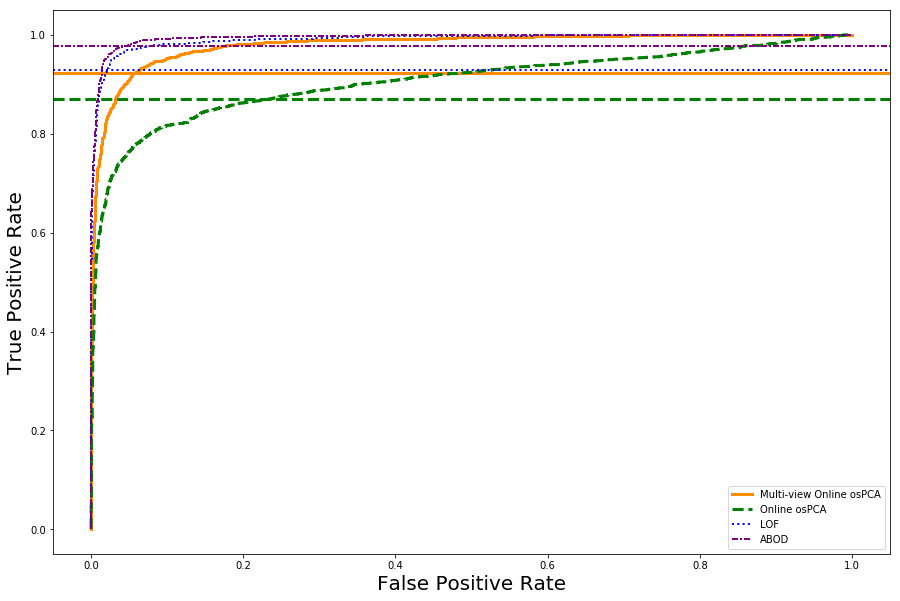

tpr:  0.9004347826086957 , fpr:  0.31173913043478263
Auc whole:  0.9130941398865785
----------------------------------
In Whuir_spectral.py, using normalized random walk!
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55]), array([122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177]), array([ 56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101,

 18%|█▊        | 1246/6900 [00:00<00:00, 12453.90it/s]

[0.06090596 0.05296408 0.05860119]
Fine Clusters:  [0 1 2]
Not update


100%|██████████| 6900/6900 [00:00<00:00, 12006.00it/s]


tpr:  0.9269565217391305 , fpr:  0.05891304347826087
Find intersection
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
[]
[]
ComLen
[53.  0.  0.]
pick
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
------------------------
[]
[124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176]
[]
ComLen
[ 0. 53.  0.]
pick
[124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176]
------------------------
[]
[]
[ 56  57  58  59  60  61  62  63  64  65  66  67  6

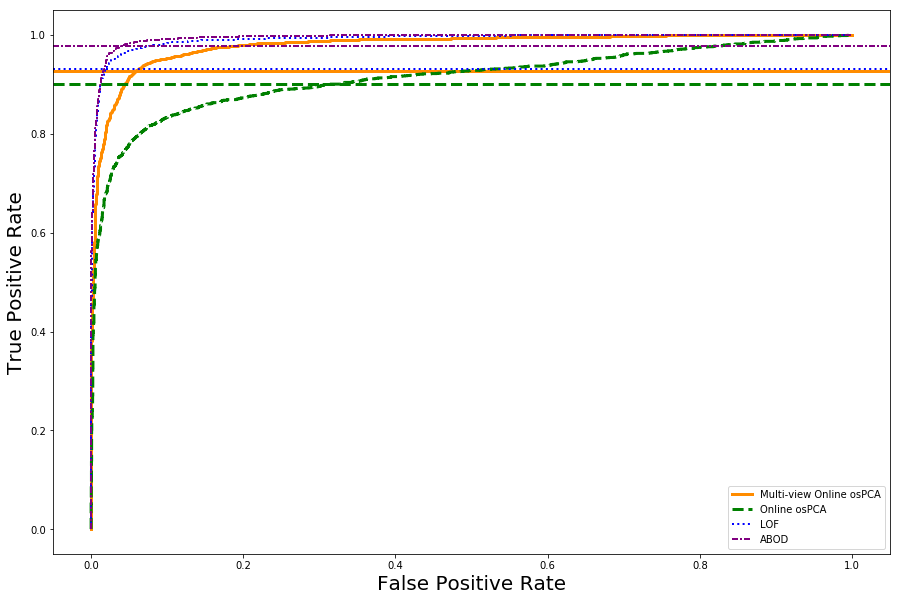

For whole dataset: 
Auc:  0.9073499621928167 +- 0.002945714903023266
Tpr:  0.8782608695652174 +- 0.011230528202409017
Fpr:  0.2597391304347826 +- 0.028129594772754826
For Laplacian: 
Average threshold: 
[0.05904834 0.06061747 0.05655108]
threshold in order: 
[0.05655108 0.05904834 0.06061747]
Auc:  0.9799282419659736 +- 0.000637032509981636
Tpr:  0.9307826086956522 +- 0.006920559217764027
Fpr:  0.0625217391304348 +- 0.006335903037198911
Fine clusters: 
[array([0, 1, 2]), array([0, 1, 2]), array([0, 1, 2]), array([0, 1, 2]), array([0, 1, 2])]
For Lof: 
Auc:  0.9911528922495274 +- 0.00018591932383623
Tpr:  0.9317391304347826 +- 0.0020018894666471738
Fpr:  0.019826086956521737 +- 0.0013707724148203863
For Abod: 
Auc:  0.9943379017013232 +- 0.0001911768461889913
Tpr:  0.9779130434782608 +- 0.0017905443723455817
Fpr:  0.04021739130434782 +- 0.002794133741401675
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

In [44]:
aucWhole, tprWhole, fprWhole, aucLap, tprLap, fprLap, thresDescend = ospca.nTrail_Whole_Laplacian_full(currentData, y_Series,
                           sRateW, ini_For_W, dropRateT_W,
                           sRateClus, ini_For_Clus, dropRateT_Clus,
                           k, thresLowBDD, strategy,
                           n_abod, contami_abod,
                           n_lof, contami_lof,
                           Name=pStr,
                           NTRAIL=NTRAIL,
                           thresUpBDD=thresUpBDD,
                           RANDOMPICK=False,
                           UPDATE=UPDATE, NOR_RAN=NOR_RAN)

In [ ]:
## looks like normalized random walk is ok, see if imporved

In [45]:
# test quick functions
ospca.quickAucTprFpr(Name=pStr)

For whole dataset: 
Auc:  0.9073499621928167 +- 0.0029457149030231934
Tpr:  0.8782608695652174 +- 0.011230528202409017
Fpr:  0.2597391304347826 +- 0.028129594772754826
For Laplacian: 
Auc:  0.9799282419659734 +- 0.0006370325099816329
Tpr:  0.9307826086956522 +- 0.006920559217764061
Fpr:  0.0625217391304348 +- 0.006335903037198909
For Lof: 
Auc:  0.9911528922495274 +- 0.00018591932383623161
Tpr:  0.9317391304347826 +- 0.002001889466647232
Fpr:  0.019826086956521743 +- 0.0013707724148203872
For Abod: 
Auc:  0.9943379017013234 +- 0.00019117684618901557
Tpr:  0.9779130434782608 +- 0.001790544372345627
Fpr:  0.04021739130434783 +- 0.0027941337414016734


In [46]:
ospca.readCommonClus(Name=pStr)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.]
[124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137.
 138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151.
 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165.
 166. 167. 168. 169. 170. 171. 172. 173. 174. 175. 176.]
[ 56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119.]


[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52.]),
 array([124., 125., 126., 127., 128., 129., 130., 131., 132., 133., 134.,
        135., 136., 137., 138., 139., 140., 141., 142., 143., 144., 145.,
        146., 147., 148., 149., 150., 151., 152., 153., 154., 155., 156.,
        157., 158., 159., 160., 161., 162., 163., 164., 165., 166., 167.,
        168., 169., 170., 171., 172., 173., 174., 175., 176.]),
 array([ 56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
        100., 101., 102., 103., 104.,

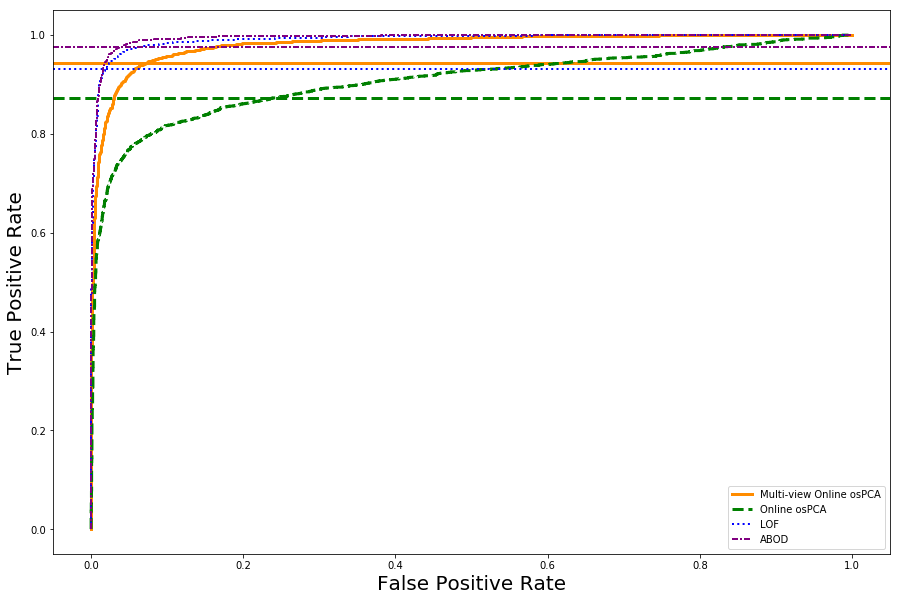

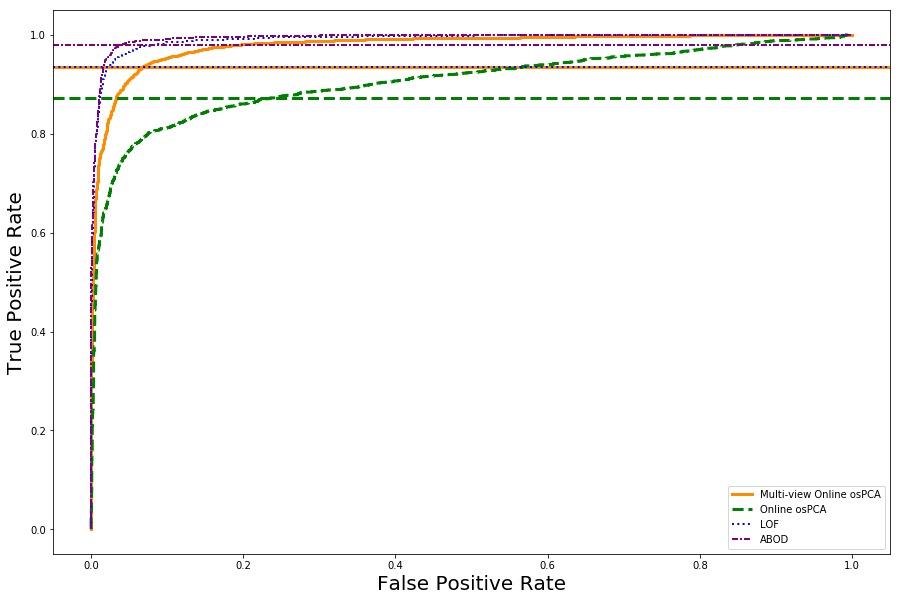

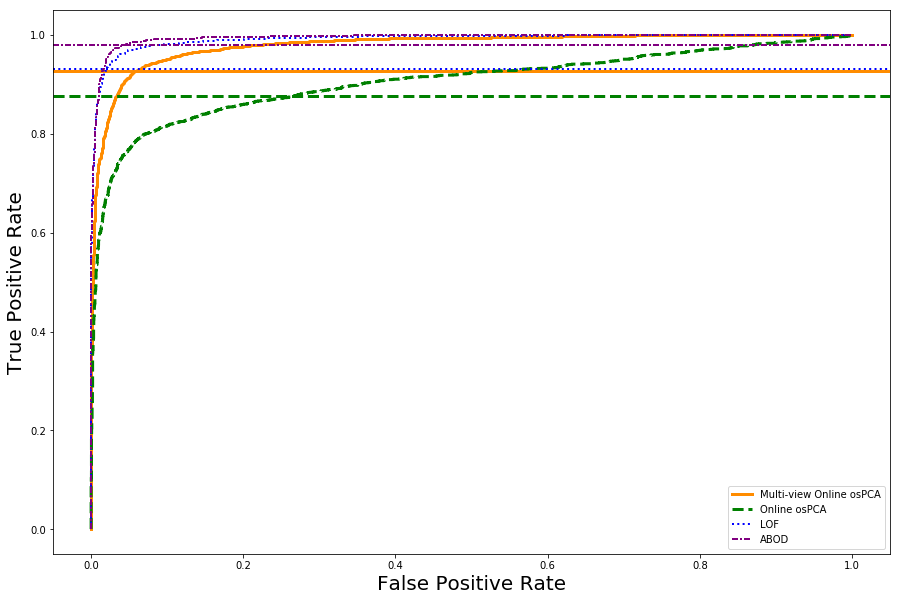

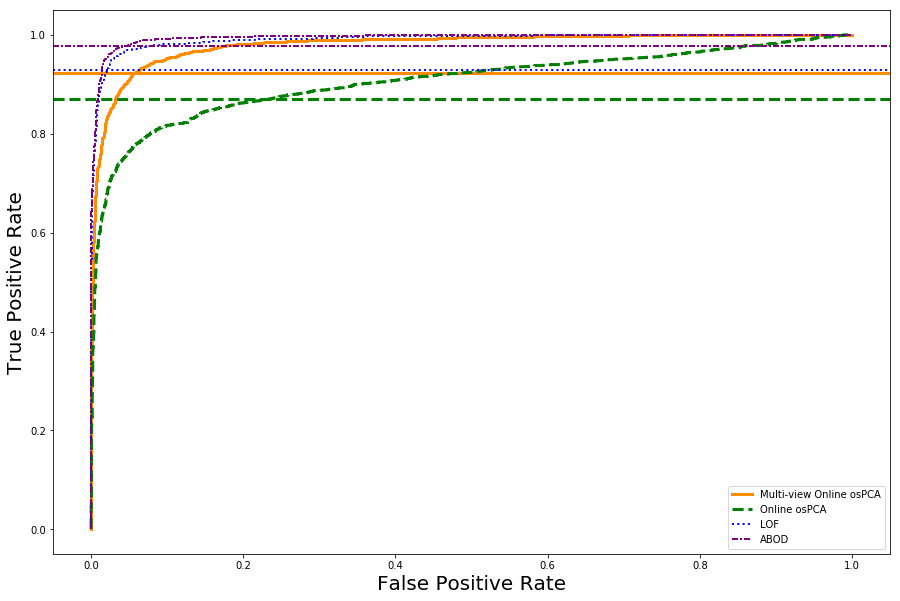

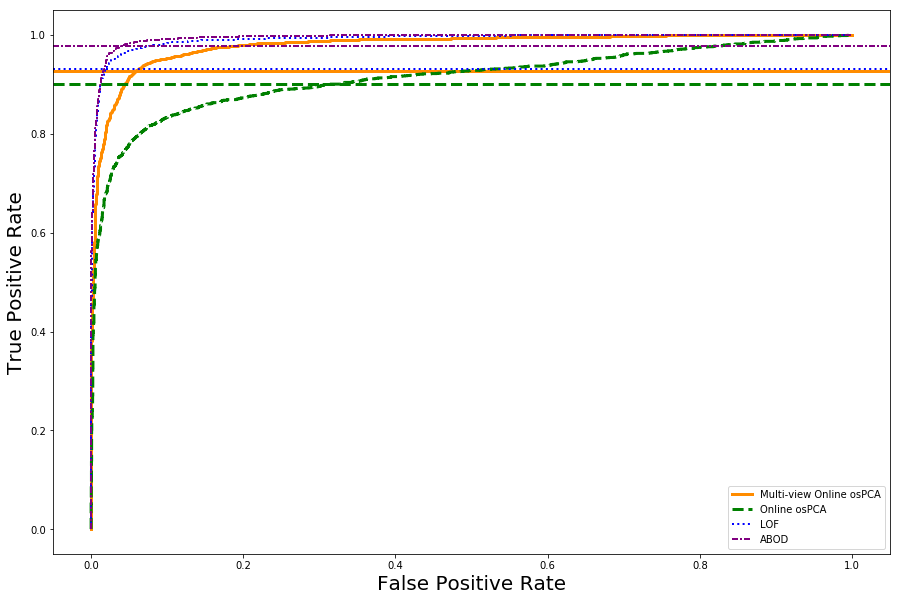

In [47]:
ospca.quick_ROC_plot(Name=pStr, NTRAIL=5)